# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 19

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [6]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 2

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [7]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
96,Pope,Burnley,54,17.037037,92,80.061463,5.4,4.699260,5.624723,4.569754,2.022239
12,Martínez,Aston Villa,51,17.037037,92,74.655317,5.4,4.381943,5.098140,4.555752,1.940357
431,Fabianski,West Ham,51,17.954545,79,76.975477,4.4,4.287242,4.700806,4.265987,1.898423
383,Lloris,Tottenham,56,17.954545,79,79.579566,4.4,4.432280,4.677604,4.283636,1.872980
8,Leno,Arsenal,50,18.809524,79,74.760537,4.2,3.974611,5.271320,3.880379,1.777500
363,McCarthy,Southampton,47,17.142857,72,64.311948,4.2,3.751530,3.919553,3.777095,1.730452
252,Alisson,Liverpool,59,15.952381,67,66.731538,4.2,4.183171,5.739711,4.002105,1.722184
217,Schmeichel,Leicester City,55,19.047619,80,76.444234,4.2,4.013322,5.292457,3.937443,1.711286
325,Darlow,Newcastle Utd,50,19.142857,67,72.540979,3.5,3.789454,3.541311,3.845403,1.694695


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
5,Cédric,Arsenal,46,2.000000,13,11.221749,6.5,5.610875,10.658585,5.545575,2.616084
39,Hause,Aston Villa,44,4.000000,28,20.909509,7.0,5.227377,7.128953,5.260203,2.492054
273,Stones,Manchester City,51,10.000000,71,52.573287,7.1,5.257329,7.257053,5.424378,2.327984
277,Cancelo,Manchester City,58,14.081633,69,72.645452,4.9,5.158880,6.757053,5.330982,2.142108
75,Bernardo,Brighton,39,2.941176,5,11.254782,1.7,3.826626,3.936799,3.742088,1.937687
558,Coufal,West Ham,47,14.883721,64,62.198189,4.3,4.178941,5.863652,4.160263,1.927602
556,Dias,Manchester City,59,16.041667,77,74.087878,4.8,4.618465,7.430881,4.780842,1.901392
470,Kilman,Wolves,41,10.000000,37,37.568570,3.7,3.756857,1.993194,3.777437,1.855379
123,James,Chelsea,51,14.000000,56,58.528661,4.0,4.180619,2.415583,4.556016,1.851209


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
23,Smith Rowe,Arsenal,45,5.000000,27,21.560273,5.4,4.312055,4.507863,4.329646,2.032722
272,De Bruyne,Manchester City,119,16.964286,95,117.378135,5.6,6.919132,8.663613,7.097396,2.005756
302,Fernandes,Manchester Utd,113,18.918919,140,126.533819,7.4,6.688216,8.113582,6.961086,1.989624
271,Gündogan,Manchester City,55,12.941176,66,60.067240,5.1,4.641559,8.239263,4.742758,1.979168
37,Grealish,Aston Villa,77,16.935484,105,92.714601,6.2,5.474576,5.834043,5.323599,1.972900
390,Son,Tottenham,97,18.051948,139,109.350102,7.7,6.057524,5.885159,5.866604,1.944954
105,Jorginho,Chelsea,47,11.000000,44,44.590953,4.0,4.053723,2.643974,4.196524,1.869843
141,Zaha,Crystal Palace,73,15.862069,92,79.392488,5.8,5.005179,3.356779,5.250481,1.852500
24,Saka,Arsenal,53,17.000000,68,71.759303,4.0,4.221135,6.273496,4.251661,1.833544


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
202,Bamford,Leeds United,67,18.070175,103,99.996562,5.7,5.533790,4.779457,5.392516,2.137890
388,Kane,Tottenham,112,17.974684,142,123.108437,7.9,6.848991,7.166930,6.668857,2.046527
514,Watkins,Aston Villa,61,17.111111,77,83.721250,4.5,4.892800,6.377061,4.675056,1.981037
506,Wilson,Newcastle Utd,66,17.037037,92,83.661250,5.4,4.910552,2.975000,4.977624,1.911430
224,Vardy,Leicester City,101,18.125000,116,108.902500,6.4,6.008414,4.784283,6.136260,1.890598
68,Maupay,Brighton,61,16.829268,69,73.975313,4.1,4.395635,4.520000,4.401251,1.779740
164,Calvert-Lewin,Everton,76,16.101695,95,77.581250,5.9,4.818204,1.850000,5.043936,1.747746
377,Adams,Southampton,60,17.142857,72,71.976562,4.2,4.198633,2.333333,4.179611,1.714085
588,Welbeck,Brighton,55,9.000000,36,35.590625,4.0,3.954514,2.300000,3.958047,1.686210


Below we compile a list sorting players based on a given metric (irrespective of position).

In [8]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next5_xP,valuePoints metric
id,,,,,,,,,,
272,De Bruyne,Manchester City,119,16.964286,95,117.378135,5.6,6.919132,7.097396,2.005756
388,Kane,Tottenham,112,17.974684,142,123.108437,7.9,6.848991,6.668857,2.046527
302,Fernandes,Manchester Utd,113,18.918919,140,126.533819,7.4,6.688216,6.961086,1.989624
254,Salah,Liverpool,125,17.916667,129,111.721542,7.2,6.235621,5.524010,1.763700
390,Son,Tottenham,97,18.051948,139,109.350102,7.7,6.057524,5.866604,1.944954
224,Vardy,Leicester City,101,18.125000,116,108.902500,6.4,6.008414,6.136260,1.890598
5,Cédric,Arsenal,46,2.000000,13,11.221749,6.5,5.610875,5.545575,2.616084
202,Bamford,Leeds United,67,18.070175,103,99.996562,5.7,5.533790,5.392516,2.137890
37,Grealish,Aston Villa,77,16.935484,105,92.714601,6.2,5.474576,5.323599,1.972900


In [9]:
metric = 'valuePoints metric'

display(df[minGames & midfielders & (df['now_cost']<63)].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
23,Smith Rowe,Arsenal,45,5.000000,5.4,4.312055,4.507863,4.215752,4.329646,2.032722
271,Gündogan,Manchester City,55,12.941176,5.1,4.641559,8.239263,5.356650,4.742758,1.979168
105,Jorginho,Chelsea,47,11.000000,4.0,4.053723,2.643974,4.162282,4.196524,1.869843
24,Saka,Arsenal,53,17.000000,4.0,4.221135,6.273496,4.065691,4.251661,1.833544
40,Trézéguet,Aston Villa,52,10.000000,2.6,4.178876,2.000000,4.375152,4.056885,1.832558
203,Harrison,Leeds United,54,16.829268,4.1,4.136670,3.940068,4.310937,4.080356,1.780139
449,Soucek,West Ham,53,18.837209,4.3,4.096109,6.120110,4.126053,4.096734,1.779236
33,Hourihane,Aston Villa,59,4.000000,5.0,4.218172,NaN,4.386668,4.156206,1.736594
45,El Ghazi,Aston Villa,58,10.888889,4.5,4.102610,4.266011,4.298274,3.981941,1.703516


In [10]:
metric = 'form 5'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                        'next5_xP','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
5,Cédric,Arsenal,46,2.000000,13,11.221749,6.5,5.610875,10.658585,5.545575,2.616084
272,De Bruyne,Manchester City,119,16.964286,95,117.378135,5.6,6.919132,8.663613,7.097396,2.005756
458,Boly,Wolves,54,12.972973,48,45.038997,3.7,3.471756,8.538525,3.473117,1.494006
271,Gündogan,Manchester City,55,12.941176,66,60.067240,5.1,4.641559,8.239263,4.742758,1.979168
302,Fernandes,Manchester Utd,113,18.918919,140,126.533819,7.4,6.688216,8.113582,6.961086,1.989624
556,Dias,Manchester City,59,16.041667,77,74.087878,4.8,4.618465,7.430881,4.780842,1.901392
273,Stones,Manchester City,51,10.000000,71,52.573287,7.1,5.257329,7.257053,5.424378,2.327984
388,Kane,Tottenham,112,17.974684,142,123.108437,7.9,6.848991,7.166930,6.668857,2.046527
39,Hause,Aston Villa,44,4.000000,28,20.909509,7.0,5.227377,7.128953,5.260203,2.492054


In [11]:
metric = 'next10_xP'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next10_xP,valuePoints metric
id,,,,,,,,,,
272,De Bruyne,Manchester City,119,16.964286,95,117.378135,5.6,6.919132,6.973266,2.005756
388,Kane,Tottenham,112,17.974684,142,123.108437,7.9,6.848991,6.732267,2.046527
302,Fernandes,Manchester Utd,113,18.918919,140,126.533819,7.4,6.688216,6.628144,1.989624
224,Vardy,Leicester City,101,18.125000,116,108.902500,6.4,6.008414,6.023479,1.890598
390,Son,Tottenham,97,18.051948,139,109.350102,7.7,6.057524,5.972445,1.944954
254,Salah,Liverpool,125,17.916667,129,111.721542,7.2,6.235621,5.893190,1.763700
37,Grealish,Aston Villa,77,16.935484,105,92.714601,6.2,5.474576,5.465826,1.972900
5,Cédric,Arsenal,46,2.000000,13,11.221749,6.5,5.610875,5.461437,2.616084
202,Bamford,Leeds United,67,18.070175,103,99.996562,5.7,5.533790,5.382771,2.137890


In [12]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','next1_xP',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,next1_xP,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,,
224,Vardy,Leicester City,101,18.125000,6.4,6.008414,5.635774,1.890598,12.4,2.5,14.9,0.822069
202,Bamford,Leeds United,67,18.070175,5.7,5.533790,5.621117,2.137890,11.1,1.2,12.3,0.680680
388,Kane,Tottenham,112,17.974684,7.9,6.848991,6.705693,2.046527,9.9,4.7,14.6,0.812254
254,Salah,Liverpool,125,17.916667,7.2,6.235621,5.405282,1.763700,9.8,3.0,12.8,0.714419
514,Watkins,Aston Villa,61,17.111111,4.5,4.892800,4.993577,1.981037,9.6,1.9,11.5,0.672078
302,Fernandes,Manchester Utd,113,18.918919,7.4,6.688216,7.346709,1.989624,9.0,6.4,15.4,0.814000
68,Maupay,Brighton,61,16.829268,4.1,4.395635,4.853252,1.779740,8.5,1.0,9.5,0.564493
164,Calvert-Lewin,Everton,76,16.101695,5.9,4.818204,4.646201,1.747746,8.3,0.6,8.9,0.552737
272,De Bruyne,Manchester City,119,16.964286,5.6,6.919132,8.224813,2.005756,8.1,6.9,15.0,0.884211


## Player Visualizations

In [13]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,goals_conceded,goals_scored,ict_index,ict_index_rank,ict_index_rank_type,in_dreamteam,influence,influence_rank,influence_rank_type,minutes,news,news_added,now_cost,own_goals,penalties_missed,penalties_order,penalties_saved,penalties_text,photo,points_per_game,red_cards,saves,second_name,selected_by_percent,special,...,xGA_week13,cleansheet_week13,xA_week13,assists_week13,xPoints week 14,xG_week14,goals_week14,xGA_week14,cleansheet_week14,xA_week14,assists_week14,xPoints week 15,xG_week15,goals_week15,xGA_week15,cleansheet_week15,xA_week15,assists_week15,xPoints week 16,xG_week16,goals_week16,xGA_week16,cleansheet_week16,xA_week16,assists_week16,xPoints week 17,xG_week17,goals_week17,xGA_week17,cleansheet_week17,xA_week17,assists_week17,xPoints week 18,xG_week18,goals_week18,xGA_week18,cleansheet_week18,xA_week18,assists_week18,form 5,form 10,next1_xP,next5_xP,next10_xP,value,value form 5,value form 10,valuePoints metric,xG+xA,xG+xA per game
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
114,3,6,123,100.0,100.0,4,124183,2.0,NaN,0,0,1,-1,214.1,73,52,6.0,NaN,2,3,1.3,2.6,2,Hakim,0.8,6,1,50.4,150,79,False,140.8,225,92,546,NaN,2020-12-05T23:00:19.905378Z,81,0,0,NaN,0,NaN,124183.jpg,3.7,0,0,Ziyech,2.8,False,...,0.5,0.0,NaN,NaN,NaN,NaN,NaN,0.5,0.0,NaN,NaN,NaN,NaN,NaN,2.1,0.0,NaN,NaN,NaN,NaN,NaN,0.7,0.0,NaN,NaN,3.382085,0.2,0.0,2.5,0.0,0.1,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2.75871,2.380564,3.595572,3.602659,3.513974,0.430245,0.340581,0.293897,1.2245,2.8,0.28


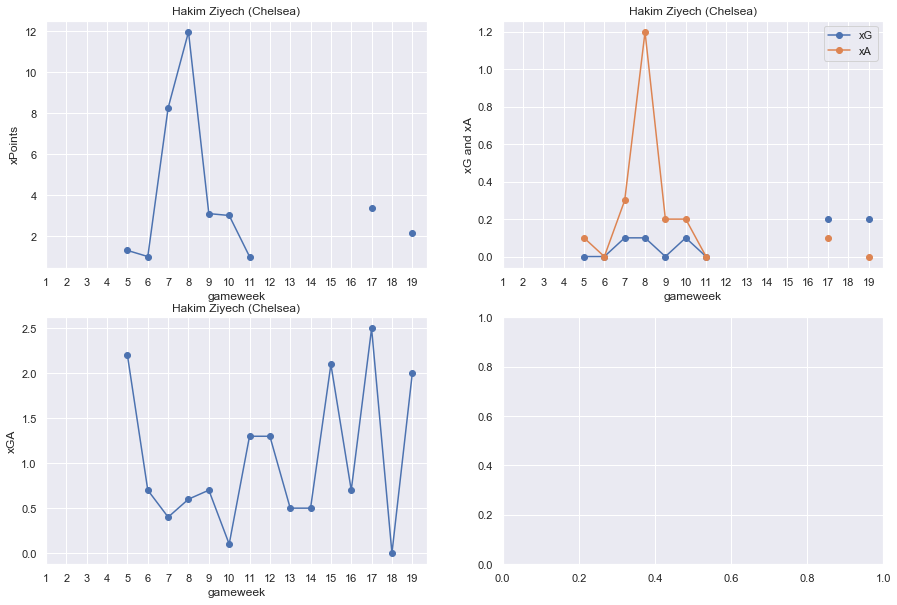

In [14]:
# find player index
name_string = 'Ziye'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
ix = playersFound.index[0]
#ix = 12

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [15]:
# find player index
df[df['web_name'].str.contains('Souc')]

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,goals_conceded,goals_scored,ict_index,ict_index_rank,ict_index_rank_type,in_dreamteam,influence,influence_rank,influence_rank_type,minutes,news,news_added,now_cost,own_goals,penalties_missed,penalties_order,penalties_saved,penalties_text,photo,points_per_game,red_cards,saves,second_name,selected_by_percent,special,...,xGA_week13,cleansheet_week13,xA_week13,assists_week13,xPoints week 14,xG_week14,goals_week14,xGA_week14,cleansheet_week14,xA_week14,assists_week14,xPoints week 15,xG_week15,goals_week15,xGA_week15,cleansheet_week15,xA_week15,assists_week15,xPoints week 16,xG_week16,goals_week16,xGA_week16,cleansheet_week16,xA_week16,assists_week16,xPoints week 17,xG_week17,goals_week17,xGA_week17,cleansheet_week17,xA_week17,assists_week17,xPoints week 18,xG_week18,goals_week18,xGA_week18,cleansheet_week18,xA_week18,assists_week18,form 5,form 10,next1_xP,next5_xP,next10_xP,value,value form 5,value form 10,valuePoints metric,xG+xA,xG+xA per game
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
449,1,10,273,NaN,NaN,7,215439,NaN,NaN,0,0,3,-3,108.5,171,104,NaN,NaN,3,3,5.6,12.2,4,Tomas,5.6,22,5,102.2,31,21,False,408.8,27,9,1710,NaN,NaN,53,0,0,NaN,0,NaN,215439.jpg,4.3,0,0,Soucek,18.6,False,...,1.1,0.0,0.0,0.0,3.135335,0.2,0.0,2.0,0.0,0.0,0.0,8.301194,0.6,1.0,1.2,0.0,0.0,0.0,3.106531,0.1,0.0,0.5,1.0,0.0,0.0,9.704837,0.7,1.0,0.1,1.0,0.1,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,6.12011,5.013728,4.126053,4.096734,4.031246,0.772851,1.154738,0.945986,1.779236,5.1,0.270741


In [19]:
my_starting11 = [12,232,558,277,271,302,37,141,506,202,388]
my_subs = [213,449,200,146]

In [20]:
print('STARTING 11')
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,51,17.037037,5.4,4.381943,5.098140,5.556198,4.860766,4.555752,1.940357
232,Chilwell,Chelsea,61,16.000000,5.0,4.150652,3.051191,3.804101,4.600974,4.522316,1.680550
558,Coufal,West Ham,47,14.883721,4.3,4.178941,5.863652,4.496229,4.589681,4.160263,1.927602
277,Cancelo,Manchester City,58,14.081633,4.9,5.158880,6.757053,5.785276,6.236010,5.330982,2.142108
271,Gündogan,Manchester City,55,12.941176,5.1,4.641559,8.239263,6.565374,5.356650,4.742758,1.979168
302,Fernandes,Manchester Utd,113,18.918919,7.4,6.688216,8.113582,7.478265,7.346709,6.961086,1.989624
37,Grealish,Aston Villa,77,16.935484,6.2,5.474576,5.834043,5.794506,5.684268,5.323599,1.972900
141,Zaha,Crystal Palace,73,15.862069,5.8,5.005179,3.356779,4.134119,4.954577,5.250481,1.852500
506,Wilson,Newcastle Utd,66,17.037037,5.4,4.910552,2.975000,4.324568,5.798450,4.977624,1.911430



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
213,Meslier,Leeds United,47,17.073171,4.1,3.362124,5.018234,4.173665,3.844302,3.484509,1.550832
449,Soucek,West Ham,53,18.837209,4.3,4.096109,6.120110,5.013728,4.126053,4.096734,1.779236
200,Dallas,Leeds United,48,17.804878,4.1,2.913165,4.225001,3.481625,3.419938,2.995761,1.329672
146,Mitchell,Crystal Palace,39,10.000000,3.1,2.890227,4.089797,4.089797,3.016174,3.121822,1.463523


## Save data

In [18]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)